In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd /proj/som

/proj/som


In [3]:
import torch
from som import som_learner, UnsupervisedDataset, SomInterpretation, UnsupervisedDataBunch, SomLearnerFast, Som, SomFast, cluster_loss

In [47]:
from torch import Tensor
from sklearn.datasets import load_iris
from typing import Tuple
from itertools import combinations_with_replacement, product

def iris():
    "Loads the IRIS dataset into two tensors."
    iris = load_iris()
    x = torch.tensor(iris.data)
    y = torch.tensor(iris.target)
    labels = iris.feature_names
    map_size = (4,4)
    alpha = 0.3
    bs = 10
    epochs = 30
    return x, y, labels, map_size, alpha, bs, epochs

def colors_uniform():
    k = 50
    x = [list(x) for x in product(list(range(k)), repeat=3)]
    from random import shuffle
    shuffle(x)
    x = torch.FloatTensor(x) * (255 / (k-1));
    y = None
    labels = ['Red', 'Green', 'Blue']
    map_size = (20, 20)
    alpha = 0.03
    bs = 50
    epochs = 2
    return x, y, labels, map_size, alpha, bs, epochs

def colors(n: int = 11000):
    "Loads a dataset containing all possible RGB color combinations"
#     x = torch.zeros(n, 3).normal_(mean=80.0, std=127.0).long().float()
    x = torch.zeros(n, 3).uniform_(0, 255).long().float()
    y = None
    labels = ['Red', 'Green', 'Blue']
    map_size = (10, 10)
    alpha = 0.03
    bs = 50
    epochs = 100
    return x, y, labels, map_size, alpha, bs, epochs


def colors_small():
    "Loads a dataset containing all possible RGB color combinations"
    x = torch.FloatTensor([
        [3, 255, 0],
        [0, 247, 3],
        [0, 252, 5],
        [3, 239, 8],
        [0, 232, 3],
        [3, 255, 0],
        [0, 250, 5],
        [255, 3, 0],
        [247, 3, 0],
        [252, 5, 0],
        [239, 8, 3],
        [232, 0, 3],
        [255, 3, 3],
        [249, 5, 3],
        [247, 3, 5],
        [3, 0, 255],
        [3, 0, 247],
        [5, 0, 252],
        [8, 2, 239],
        [0, 3, 232],
        [3, 3, 255],
        [5, 3, 249],
        [3, 5, 247],
        [8, 3, 234],
        [3, 5, 247],
        [5, 3, 234],
    ])
    y = None
    labels = ['Red', 'Green', 'Blue']
    map_size = (3, 3)
    alpha = 0.01
    bs = 4
    epochs = 100
    return x, y, labels, map_size, alpha, bs, epochs

def uniform(n: int = 11000, s: int = 3):
    "Loads a uniform dataset"
    x = torch.randn(n, s)
    y = None
    labels = list(range(s))
    map_size = (6, 6)
    alpha = 0.03
    bs = 50
    epochs = 150
    return x, y, labels, map_size, alpha, bs, epochs
    

## Create the dataset

We use one of the data loading functions defined above together with the `UnsupervisedDataBunch` class.

In [48]:
x, y, labels, map_size, alpha, bs, epochs = colors_uniform()

In [49]:
db = UnsupervisedDataBunch(x, valid=0.0, sampler='seq', bs=bs)

In [50]:
# db.normalize('minmax')

In [51]:
db.train_ds.tensors[0]

tensor([[130.1020, 119.6939,  15.6122],
        [ 46.8367, 114.4898, 249.7959],
        [124.8980, 109.2857, 176.9388],
        ...,
        [ 46.8367,  20.8163, 119.6939],
        [ 36.4286, 255.0000, 161.3265],
        [223.7755, 234.1837, 228.9796]])

In [52]:
n_batches = x.shape[0] // bs
alpha, bs, epochs, n_batches

(0.03, 50, 2, 2500)

## Create the Learner

First, let's define the map size:

In [53]:
size = (map_size[0], map_size[1], x.shape[-1])
size

(20, 20, 3)

Then we can create a Som model of the required size and pass it to a `SomLearner`:

In [54]:
# learn = SomLearnerFast(db, som)
# learn = SomLearnerFast(db, som, loss_func=None)
learn = SomLearnerFast(db, Som(size, alpha=alpha), visualize=True)

LR Find doesn't work at the moment, since it is useless on a pre-trained SOM and there is no way to pass the LR parameter directly to the model.

In [55]:
# learn.lr_find()

In [56]:
# learn.recorder.plot()

## Performance check

In [57]:
s = SomFast(size)
s

SomFast(size=(20, 20), neuron_size=3, alpha=tensor([0.0030], device='cuda:0'), sigma=tensor([10.], device='cuda:0')), dist_fn=<function pairwise_distance at 0x7efb28571510>

In [58]:
db.train_ds.tensors[0].shape

torch.Size([125000, 3])

In [59]:
# def myfun():
#     for _ in range(len(db.train_ds.tensors[0]) // bs):
#         xb, yb = db.one_batch()
#         out = s.forward(xb)
#         s.backward()
# #         loss = cluster_loss(out, xb, s, device=s.device)
# #         loss.backward()

In [60]:
# %time myfun()

In [67]:
xb, yb = db.one_batch()

## Training the model

This uses various SOM callback classes by default to visualize weights and update hyperparameters.

<IPython.core.display.Javascript object>


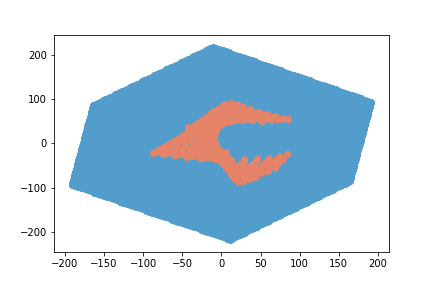

<IPython.core.display.Javascript object>


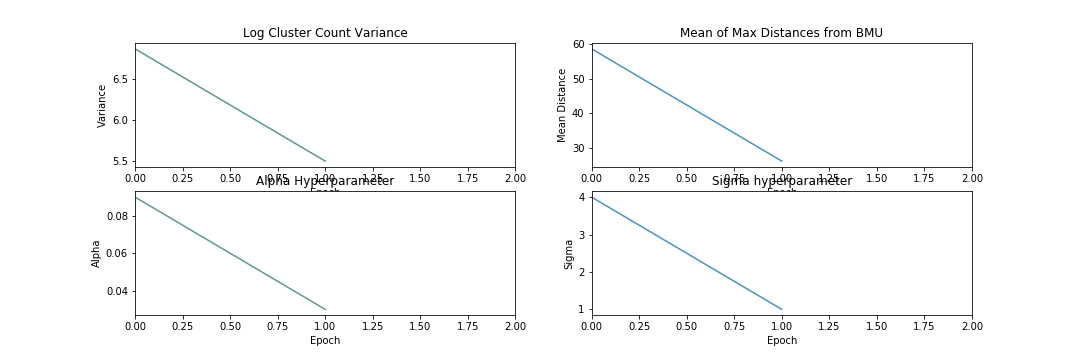

epoch,train_loss,valid_loss,time
0,0.000000,#na#,00:04
1,0.000000,#na#,00:04


<IPython.core.display.Javascript object>


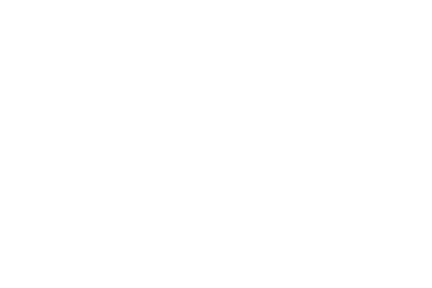

<IPython.core.display.Javascript object>


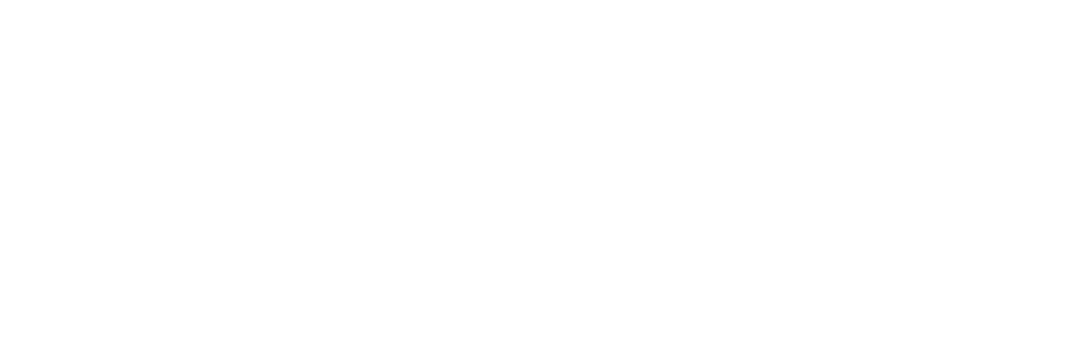

In [61]:
%matplotlib notebook
learn.fit(epochs)

In [62]:
interp = SomInterpretation.from_learner(learn)

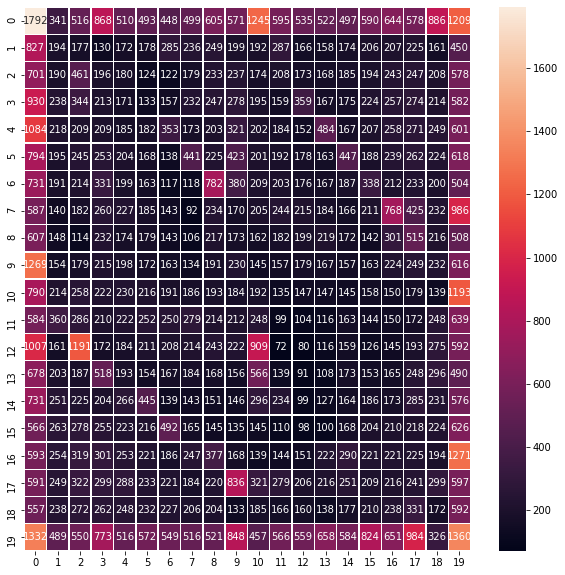

In [63]:
%matplotlib inline
interp.show_hitmap()

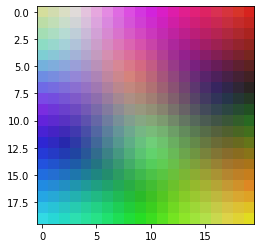

In [64]:
interp.show_weights()

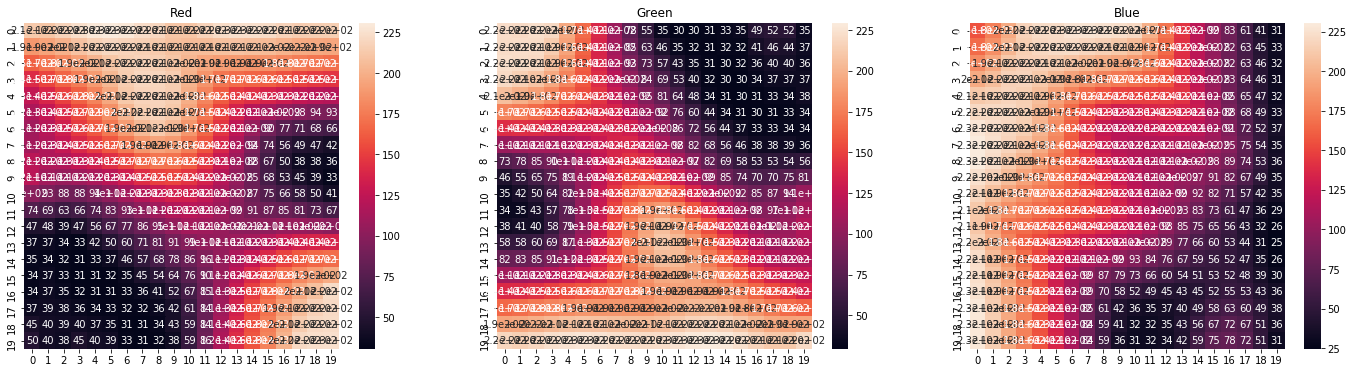

In [65]:
interp.show_feature_heatmaps(labels=labels)

In [23]:
v.show(som, what='codebook')

NameError: name 'v' is not defined

In [ ]:
# !pip install git+https://github.com/sevamoo/SOMPY

In [29]:
import sompy

In [30]:
som = sompy.SOMFactory.build(x.cpu().numpy(), map_size, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='random', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything

 Training...
 random_initialization took: 0.006000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 1

 epoch: 1 ---> elapsed time:  0.259000, quantization error: 0.443807

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 1

 epoch: 1 ---> elapsed time:  0.260000, quantization error: 1.545069

 Final quantization error: 1.545069
 train took: 0.533000 seconds


In [31]:
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8) 

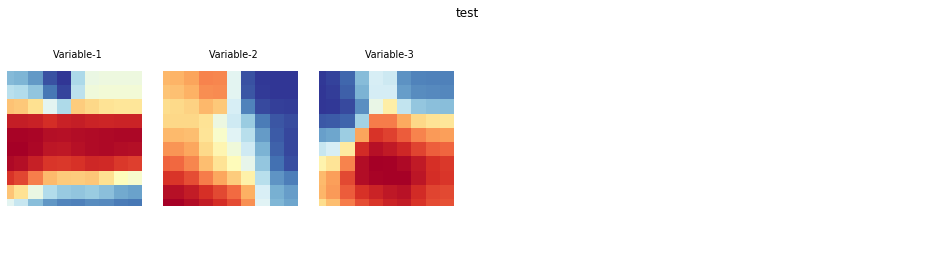

In [32]:
v.show(som, what='codebook')

/opt/conda/lib/python3.6/site-packages/sompy/visualization/mapview.py:163: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(1, 1, 1)


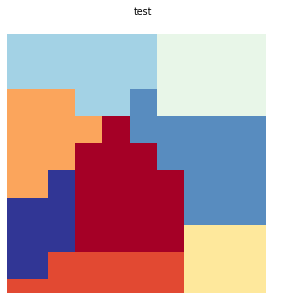

In [34]:
v.show(som, what='cluster')